# Домашнее задание 4.

## Задание 1

### 1.1. Скачать данные по ссылке https://www.kaggle.com/datasets/esratmaria/house-price-dataset-with-other-information



In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 

In [139]:
data = pd.read_csv('kc_house_data.csv')
data.shape

(21613, 21)

- id - Уникальный ID для каждого дома
- date - Дата продажи дома
- price - Стоимость продажи дома
- bedrooms - Кол-во спален
- bathrooms - Кол-во ванных комнат (0.5 - туалет без душа)
- sqft_living - Кв. метры жилые
- sqft_lot - Кв. метры общие
- floors - Кол-во этажей
- waterfront - Есть набержная или нет
- view - Значение от 0 до 4 насколько хороший вид
- condition - Значение от 1 до 5 насколько хорошее состояние
- grade - Значение от 1 до 13, где 1-3 плохая конструкция здания и дизайн, 7 - средний уровень конструкции и дизайна, 11-13 - высокое качество конструкции и дизайна
- sqft_above - Кв. метры дома, которые находятся выше земли
- sqft_basement - Кв. метры дома, которые находятся ниже земли
- yr_built - Год постройки дома
- yr_renovated - Год ремонта дома
- zipcode - Индекс
- lat - Широтма
- long - Долгота
- sqft_living15 - Кв. метры жилой площади у 15 соседей
- sqft_lot15 - Кв. метры общей площади у 15 соседей


### 1.2 Изучите стоимости недвижимости

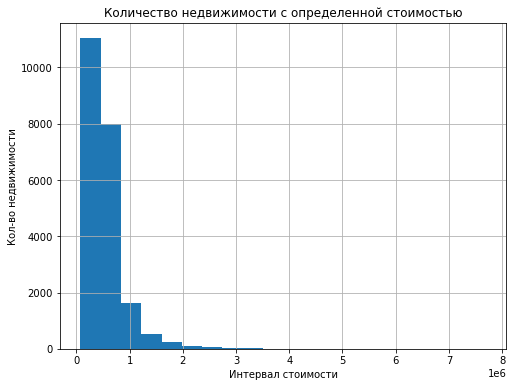

In [33]:
plt.figure(figsize=(8,6))
plt.hist(data['price'], bins = 20)
plt.title('Количество недвижимости с определенной стоимостью')
plt.xlabel('Интервал стоимости')
plt.ylabel('Кол-во недвижимости')
plt.grid();

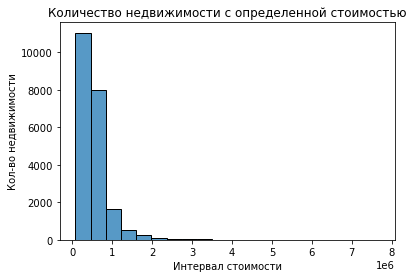

In [32]:
plt.figure(figsize= (6,4))

plt.title('Количество недвижимости с определенной стоимостью')
sns.histplot(data['price'], bins = 20)
plt.xlabel('Интервал стоимости')
plt.ylabel('Кол-во недвижимости')
plt.show()

### Вывод: основная масса домов находится в ценовой категории до 1 млн.

### 1.3 Изучите распределение квадратуры жилой площади

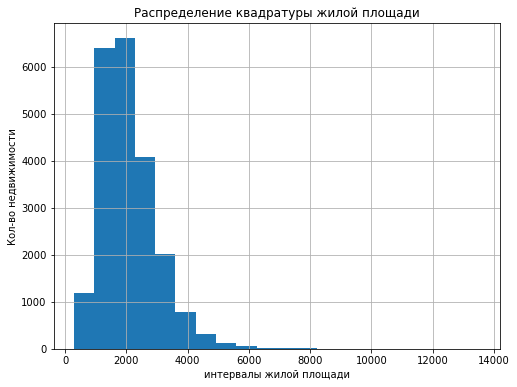

In [36]:
plt.figure(figsize=(8,6))
plt.hist(data['sqft_living'], bins = 20)
plt.title('Распределение квадратуры жилой площади')
plt.xlabel('интервалы жилой площади')
plt.ylabel('Кол-во недвижимости')
plt.grid();


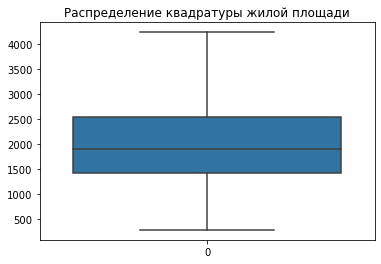

In [43]:
plt.figure(figsize=(6,4))
sns.boxplot(data=data['sqft_living'], showfliers=False)
plt.title('Распределение квадратуры жилой площади');


### Вывод: основная масса домов по жилой площади находится в интервале от 1000 до 2400 кв.футов. Значение медианы равно 2000 кв.фут. Все что выше 4200 кв.фут похоже на выбросы(судя по ящику с усами. На мой взгляд выше 8000 кв.фут выбросы.

### 1.4 Изучите распределение года постройки
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы


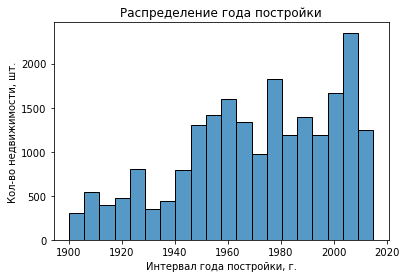

In [49]:
plt.figure(figsize= (6,4))

plt.title('Распределение года постройки')
sns.histplot(data['yr_built'], bins = 20)
plt.xlabel('Интервал года постройки, г.')
plt.ylabel('Кол-во недвижимости, шт.')
plt.show()

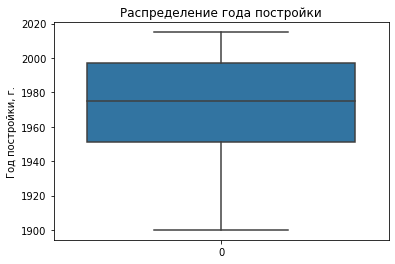

In [50]:
plt.figure(figsize=(6,4))
sns.boxplot(data=data['yr_built'], showfliers=False)
plt.ylabel('Год постройки, г.')
plt.title('Распределение года постройки');


#### Вывод: основная масса домов по году постройки находится в интервале от 1950 до 1995 года. Значение медианы равно 1975 год. Все что выше 2017 года и ниже 1900 года похоже на выбросы(судя по ящику с усами). 

## Задание 2

### 2.1 Изучите распределение домов от наличия вида на набережную

In [53]:
counts= data['waterfront'].value_counts()
counts

0    21450
1      163
Name: waterfront, dtype: int64

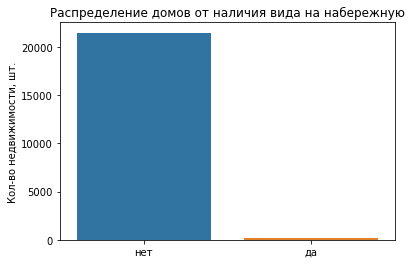

In [56]:
plt.figure(figsize= (6,4))
plt.title('Распределение домов от наличия вида на набережную')
sns.barplot(x = counts.index,y = counts.values)
plt.ylabel('Кол-во недвижимости, шт.')
plt.xticks([0, 1], ['нет', 'да'])
plt.show()

### Вывод: основная масса домов без вида на набережную

### 2.2 Изучите распределение этажей домов

In [57]:
counts_floors= data['floors'].value_counts()
counts_floors

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

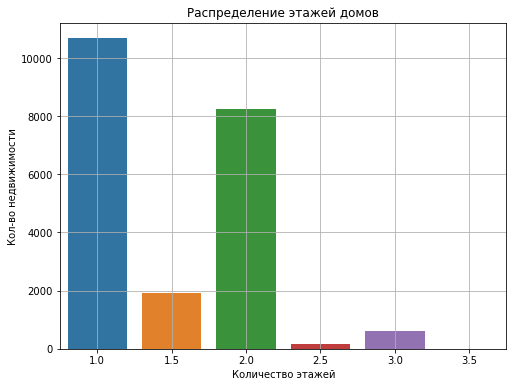

In [58]:
plt.figure(figsize=(8,6))
sns.barplot(x = counts_floors.index, y = counts_floors.values)
plt.title('Распределение этажей домов')
plt.xlabel('Количество этажей')
plt.ylabel('Кол-во недвижимости')
plt.grid();

#### Вывод: основная масса домов одно и двухэтажные.

### 2.3 Изучите распределение состояния домов
- Постройте график
- Сделайте выводы


In [60]:
counts_condition= data['condition'].value_counts()
counts_condition

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

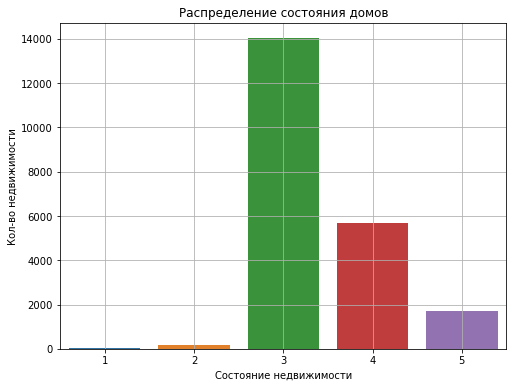

In [61]:
plt.figure(figsize=(8,6))
sns.barplot(x = counts_condition.index, y = counts_condition.values)
plt.title('Распределение состояния домов')
plt.xlabel('Состояние недвижимости')
plt.ylabel('Кол-во недвижимости')
plt.grid();

#### Вывод: основная масса домов в среднем состоянии и выше среднего. В плохом состоянии домов менее 1 процента.

## Задание 3

### Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
#### Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.


#### Зависимость стоимости от наличия вида

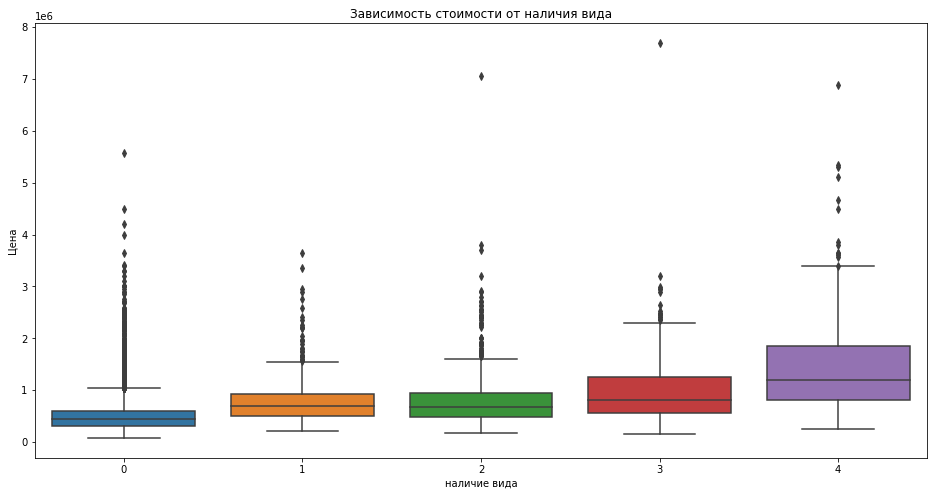

In [63]:
plt.figure(figsize=(16,8))
sns.boxplot(x=data['view'], y = data['price'], whis = 1.5)
plt.ylabel('Цена')
plt.xlabel('наличие вида')
plt.title('Зависимость стоимости от наличия вида');


Наличие вида  гарантирует цену выше,чем отсутствие вида совсем. При виде >= 2 наблюдается зависимость: чем лучше вид, тем выше цена. Вид категории 1 или 2 незначительно влияет на цену.

### Зависимость стоимости от жилой площади

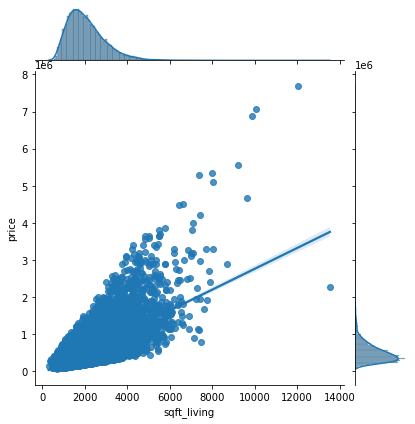

In [101]:

sns.jointplot(x=data['sqft_living'], y = data['price'], kind='reg' );


Чем больше жилая площадь, тем выше стоимость недвижимости. Наблюдается нечто похожее на прямую линейную зависимость( коэффициент корреляции около 0,7).

In [68]:
corr_matrix = data.corr()
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


### Зависимость стоимости от оценки недвижимости

In [97]:
data['grade'].max()

13

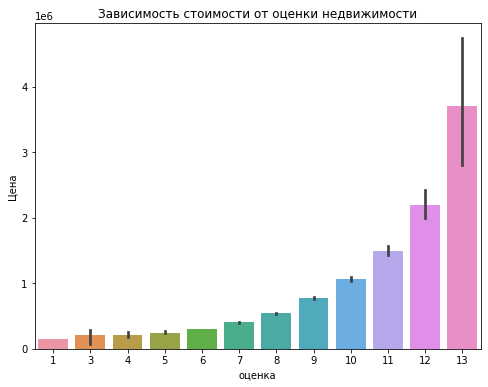

In [98]:
plt.figure(figsize= (8,6))

plt.title('Зависимость стоимости от оценки недвижимости')
sns.barplot(x = data['grade'],y = data['price'])
plt.ylabel('Цена')
plt.xlabel('оценка')

plt.show()

Чем больше оценка недвижимости, тем выше стоимость недвижимости. Наблюдается заметная прямая линейная зависимость( коэффициент корреляции около 0,66).

### Зависимость цены от наличия набережной

Изучитаем с помощью  многорядной столбчатой диаграммы.


In [129]:
data2= pd.crosstab(data['price'],data['waterfront']).reset_index()
data2.rename(columns={0: 'no', 1: 'yes'}, inplace=True)
data2.tail()



waterfront,price,no,yes
4023,5350000.0,1,0
4024,5570000.0,1,0
4025,6885000.0,1,0
4026,7062500.0,0,1
4027,7700000.0,1,0


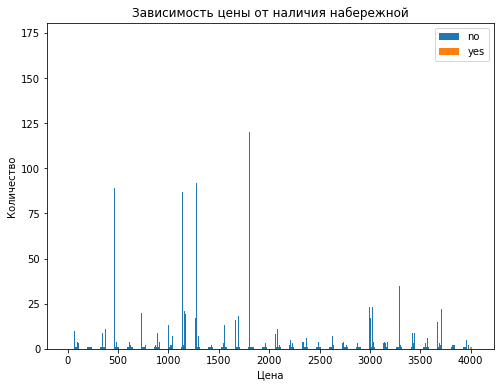

In [128]:
plt.figure(figsize= (8,6))
n_ticks= np.arange(len(data2['no']))
offset=0.3
w=0.4
plt.bar(n_ticks-offset,data2['no'],width=w)
plt.bar(n_ticks+offset,data2['yes'],width=w)
plt.title('Зависимость цены от наличия набережной');
plt.ylabel('Количество')
plt.xlabel('Цена')
plt.legend(['no', 'yes']);



По этому графику ничего сказать не можем, так как очень мало недвижимости с набережными(менее 1 процента). 

### Круговая диаграмма: доля недвижимости до и свыше 1млн

In [138]:
count = 0
for i in data['price'].values:
    
    if i < 1000000:
        count = count + 1
    
count

20121

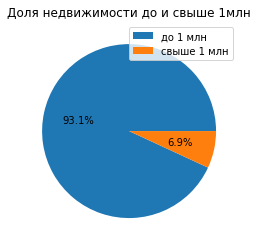

In [142]:
counts = [count, 21613- count ]
plt.figure(figsize=(6,4))
plt.pie(counts, autopct='%1.1f%%')
plt.legend(['до 1 млн ', 'свыше 1 млн']);
plt.title('Доля недвижимости до и свыше 1млн');

#### Зависимость стоимости от количества спален

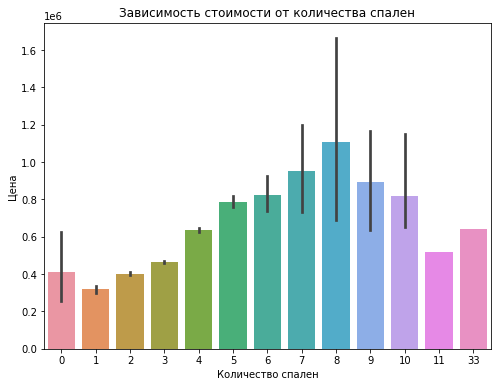

In [143]:
plt.figure(figsize= (8,6))

plt.title('Зависимость стоимости от количества спален')
sns.barplot(x = data['bedrooms'],y = data['price'])
plt.ylabel('Цена')
plt.xlabel('Количество спален')

plt.show()

Стоимость недвижимости при возрастании количества спален растет( до 8 спален), дальнейший рост количества спален не увеличивает стоимость недвижимости